# Student Opinions on Courses in Relation with Piazza.com Engagement
## INFO 2950 Final Project
#### Amina Shikhalieva, Gauri Pidatala

## Introduction

The purpose of this report is to utilize data publicly available on [piazza.com](https://piazza.com/) and [ratemyprofessors.com](https://www.ratemyprofessors.com/) to answer the question: "What makes a class good?". We use ratings for professors as a general indicator of how positive or negative the average student's experience was with the professor for a particular course for a particular semester, and look for patterns between good ratings and other observations in our data. Variables like class size (reflected by the Piazza enrollment), average percentage of the class engaging on Piazza, course level, and average instructor response time on Piazza are all analyzed. 
Maximizing learning and improving the student experience in a class should always be a prioritiy of instructors. If this investigation shows that behaviors like encouraging student engagement on piazza.com, responding to piazza questions in a timely manner, and limiting class sizes significantly correlates with higher student ratings of a class, this information can be used to improve student satisfaction and learning for a large range of courses both at Cornell and elsewhere. Especially now in the shift to online learning, resources such as piazza.com are becoming one of the only ways some students have of getting help in and engaging in a course, so it is only more important now to understand the its impact in learning.

[] insert findings summary []

## Data Description


#### Dataset description
- all_data:
    - observances: each row represents one review on [ratemyprofessors.com](https://www.ratemyprofessors.com/)
    - attributes:
        - instructor: string, full name of the instructor who the review is about
        - quality: int, 1-5, rating quality of the professor
        - difficulty: int, 1-5, rating difficulty of professor's teaching style
        - take_again: string, whether or not the reviewer would retake the course given their experience in it	
        - timestamp: string, date of when review was posted
        - course_number: int, number portion of course name
        - department: string, abbreviation of course department, from course name
        - course_name: string, full course name (department + number)
        - avg_quality: float, average quality rating of instructor who the review is about
        - avg_difficulty: float, average difficulty rating of instructor who the review is about	
        - questions: int, total questions asked on piazza for the course taught by the professor for the course and professor the review is about
        - %response: float, percentage of piazza questions that got a response for the course taught by the professor for the course and professor the review is about
        - contributions: int, total number of piazza contributions for the course taught by the professor for the course and professor the review is about
        - avg_response_time: int, number of minutes the average piazza question had been waiting for an answer for the course taught by the professor for the course and professor the review is about	
        - enrolled: int, total number of students signed into the piazza for the course taught by the professor for the course and professor the review is about
        - %instructor_response: float, percentage of piazza questions answered by instructors for the course taught by the professor for the course and professor the review is about
        - %active: float, percentage of students enrolled who contributed on piazza at least once, for the course taught by the professor for the course and professor the review is about
        - semester: string, the semester a piazza course was taken (not necessarily the same semester as the review for the course)
      

#### Data acquisition
*see [web scraping code appendix](Appendix2.ipynb)*
##### **piazza.com** 
* See [piazza_data_collect.ipynb](piazza_data_collect.ipynb) 
* Every course on Piazza has a stats report accessible to anyone enrolled in the class (under the statistics tab). A few courses do not have this report because there was not enough piazza activity. 
* We compiled a list of courses (with no duplicates) from various departments taught in various semesters that used piazza.com as an interactive platform. For each of these courses, we recorded the URL for its stats page in the file "piazza_stats.txt". Here we also manually added the semester corresponding to each stats report. We then iterated through each of the URLs in the file and recorded in "piazza .csv" various attributes for each course
* As of now, some of our piazza stats course names are irregular. Because there is only a small number of these irregularities and they don't follow any particular pattern, we chose to manually fix each one
* We also need to get rid of the '%' following the values in columns "% response" and "instructor_response"
* We also want to be able to group our courses by departments

##### **ratemyprofessors.com** 
* See [data_collect.ipynb](data_collect.ipynb)
* We manually associate each course element of our piazza.csv database with the name of the professor who taught it that semester. We then manually aqcuire the URLs of the associated ratemyprofessors.com page of each of these professors and record them in the file "Rate_my_prof.txt". We then iterate through each URL in this file and scrape the necessary attributes for each review for the course we are looking for.
* Because a review page for a professor includes many 
* Some ratemyprofessors.com reviews are void because when they were scraped the ads on the page corrupted some of the observations
    - So we need to remove these observations. Every review is guaranteed to have a quality rating
    - Because the course names are listed as a single string, we need to split the department name and course number and delete reviews with typos in the course name
    - We also need to convert columns that hold number values from string to int (eg, Difficulty)
    
 

#### Preprocessing and cleaning
See [Data collection and cleaning appendix](Appendix.ipynb)
* Piazza data:
    * Some of our course names had irregularities when we scraped directly from the stats pages(eg, having the semester included in the name). Because we had relatively few of these cases in our ~50 courses, we manually adjusted these names to be of the form DEPT####.
    * We went through the columns that were supposed to hold numerical values and converted them from strings to ints or floats, as appropriate, and removed preceding "%" signs as needed
    * Because we were interested in data such as the course level and department, we created two more columns by splitting the course name into its numerical and departmental values, eg) "CS3110" -> "CS", 3110
    
* Ratemyprofessors data:
    * Some entries had only the instructor name and null values for all fields. This was caused by ads on the page being picked up by our scraping code. So we deleted all entries that did not have the "quality" field because every review was required to have a value for the quality rating.
    * Many reviews had typos in the course names (eg, "CS111" instead of "CS1110"). Also, there were some courses whos instructor had very few reviews. We resolved both of these issues at once my only including a review if at least 4 other reviews had the same course name. So, reviews for courses with 4 or fewer reviews were not included (to get a larger data sample and more accurate analysis) and reviews with misspelled course names were not included to minimize ambiguity (because there were far too many reviews to manually correct typos for).
    * We went through the columns that were supposed to hold numerical values and converted them from strings to ints or floats, as appropriate
    
 * Merging into all_data:
     * To easily cross analyze our two sets of data, we did an inner merge of our ratings and piazza data on both the name of the instructor and the name of the course taught. We then did a little column renaming and dropping to tidy up redundencies and inconsistencies. 

#### Raw data

* Manually entered: 
    - [piazza_links.txt](piazza_links.txt)
    - [Rate_my_prof.txt](Rate_my_prof.txt)
* Automatically compiled / scraped using above input:
    - [piazza_data.csv](piazza_data.csv)
    - [rmp.csv](rmp.csv)
* Final dataset used in analysis:
    - [all_data](all_data.csv)

#### Potential drawbacks and limitations
* While we did manage to get data corresponding to a wide variety of courses, including Econ, CS, and Physics, we did not have many of each kind of course. Particularly, we do not have enough to be able to look at potential trends across departments like we had hoped.
* A couple classes had two instructors. Because we did not know how to logically deal with this, we chose the instructor who taught the most lectures, determined by asking the students who took such classes. 



## Preregistration Statement

#### Analyses:

- Use multi-variable linear regression to try to predict the rating of the professor teaching the course (with training values gathered from ratemyprofessors.com)
    - Predicting variables:
        - class size (approximated by Piazza enrollment)
        - department (use dummy values for each group)
        - Piazza activity (as a percent)
    - The results will help us understand if there is a strong linear relationship between the combination of these three variables with the ratings of students' experiences with the professor teaching the class, which we will interpret as strongly correlated with the quality of the students' experience in the class 
    
- Use k-means clustering to plot class size by professor rating, color coded by clusters
    - Clusters: departments
    - This may show us if certain departments correspond with larger class sizes or higher ratings
    - The results may be useful if there is in fact such a relationship, so if we see some deparments consistently have lower ratings than others, then leaders at the heads of those departments could see if a change in class sizes or Piazza engagement may help students have a better learning experience in their department.
    
- Use linear regression and correlation coefficient to determine if there is a correlation between the variables class size and piazza activity for a course.
    - A strong correlation here may suggest that students feel more confident asking questions in smaller classes than bigger classes and vice versa. 
    
- Use linear regression and correlation coefficient to determine if there is a correlation between the variables instructor response time and piazza activity for a course.
    - This may help us determine whether classes with higher instructer involvement result in higher student involvement for a course.


## Data Analysis

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as seabornInstance 
import plotly.express as px
from sklearn.cluster import KMeans


piazza_data = pd.read_csv('piazza.csv')
ratings_data = pd.read_csv('rmp.csv')
all_data = pd.read_csv('all_data.csv')

#### Use multi-variable linear regression to try to predict the rating of the professor teaching the course (with training values gathered from ratemyprofessors.com)
    - Predicting variables:
        - class size (approximated by Piazza enrollment)
        - department (use dummy values for each group)       
        - Piazza activity (as a percent)


In [7]:
l = LinearRegression()

# dummy values for department
# all_data['department'] = all_data['department'].str.strip()
# dept_map = {"CS": 1, "CHEM": 2, "PHYS": 3, "AEP": 4, "MATH": 5, 'INFO': 6, 'ECE': 7, 'MAE': 8, 'ENGRI': 9, 'ORIE':10}
# all_data['dept_map'] = all_data['department'].replace(dept_map)

model = l.fit(all_data[['enrolled',  '%active', '%response']], all_data[['avg_quality']])
predict = model.predict(all_data[['enrolled',  '%active', '%response']])
r = model.score(all_data[['enrolled',  '%active', '%response']], all_data[['avg_quality']])
print('enrolled coefficient: {:.2f}'.format(model.coef_[0][0]))
# print('department coefficient: {:.2f}'.format(model.coef_[0][1]))
print('%active coefficient: {:.2f}'.format(model.coef_[0][1]))
print('%response coefficient: {:.2f}'.format(model.coef_[0][2]))
model.coef_

enrolled coefficient: 0.00
%active coefficient: 0.01
%response coefficient: -0.04


array([[ 0.00159514,  0.00824933, -0.03797179]])


  * We can also try the multivariable regression again with difficulty ratings. Since we saw that quality and difficulty ratings had very little correlation, we'd like to verify that these factors have no real correlation with difficulty ratings either:

In [8]:
model = l.fit(all_data[['enrolled', '%active', '%response']], all_data[['avg_difficulty']])
predict = model.predict(all_data[['enrolled', '%active', '%response']])
r = model.score(all_data[['enrolled',  '%active', '%response']], all_data[['avg_difficulty']])
print('enrolled coefficient: {:.2f}'.format(model.coef_[0][0]))
print('%active coefficient: {:.2f}'.format(model.coef_[0][1]))
print('%response coefficient: {:.2f}'.format(model.coef_[0][2]))
model.coef_

enrolled coefficient: -0.00
%active coefficient: 0.01
%response coefficient: -0.06


array([[-0.00017411,  0.0077663 , -0.06494488]])

Intercept: 
 2.8125599413159987
Coefficients: 
 [0.00116449 0.00536463]
R2 value: 
 0.025244109479385046


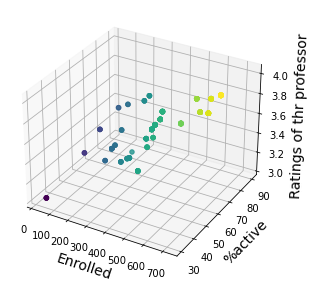

In [9]:
Y = all_data['quality']
X = all_data[['enrolled', '%active']]
regr = LinearRegression()
model = regr.fit(X, Y)
response = model.predict(X)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('R2 value: \n', regr.score(X, Y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X.iloc[:,0],X.iloc[:,1], response , c=response, cmap='viridis')
ax.set_xlabel('Enrolled', fontsize=14)
ax.set_ylabel('%active', fontsize=14)
ax.set_zlabel('Ratings of thr professor', fontsize=14)
fig.tight_layout()

In [11]:
#3d scatter plot against enrolled, %active and quality
fig = px.scatter()
fig = px.scatter_3d(all_data, x = '%response', y = '%active', z = 'quality', color = 'department')
fig.show()

#### Use k-means clustering to plot class size by professor rating, color coded by clusters
    - Clusters: departments

[3 3 3 3 3 3 3 3 3 3 3 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1
 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 1 4 1 4 1 1 1 4
 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1
 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1 1 4 1 1
 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 4 4 4 4
 4 4 4 4 4 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0
 0 0 0]


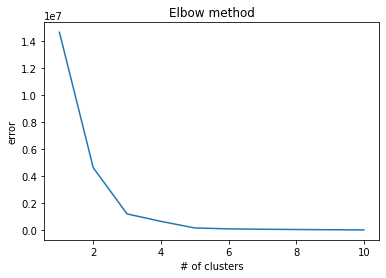

In [22]:
x = all_data.iloc[:, [2, 15]].values
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
kmeans5.cluster_centers_
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('# of clusters')
plt.ylabel('error')
plt.show()

[2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 1 1 1
 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0]


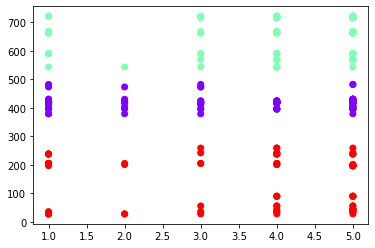

In [25]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)
plt.scatter(x[:, 0],x[:, 1], c=y_kmeans3, cmap='rainbow' )

- **Analysis**: 


#### Use linear regression and correlation coefficient to determine if there is a correlation between the variables class size and piazza activity for a course.

In [ ]:
plt.scatter(all_data['enrolled'], all_data['%active'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('% of Enrolled students active')

l = LinearRegression()
model = l.fit(np.array(all_data[['enrolled']]).reshape(-1,1), all_data[['%active']])
predictions = model.predict(all_data[['enrolled']])
r = model.score(all_data[['enrolled']],all_data['%active'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

- **Analysis**: 


#### Use linear regression and correlation coefficient to determine if there is a correlation between the variables instructor response time and piazza activity for a course.

In [ ]:
#plot
plt.scatter(all_data['avg_response_time'], all_data['%active'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('% of Enrolled students active')

#model
l = LinearRegression()
model = l.fit(np.array(all_data[['avg_response_time']]).reshape(-1,1), all_data[['%active']])
predictions = model.predict(all_data[['avg_response_time']])
r = model.score(all_data[['avg_response_time']],all_data['%active'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

    - We can see by the plot that there is an outlier where the average response time is over 80 minutes, let's see if removing it gives us a better idea of the trend in the data.

In [ ]:
#new copy of all_data with outlier removed
all_data_copy = all_data.copy()
all_data_copy = all_data_copy[all_data_copy.avg_response_time < 80]

#previous code the same, with new version of all_data
plt.scatter(all_data_copy['avg_response_time'], all_data_copy['%active'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('% of Enrolled students active')

l = LinearRegression()
model = l.fit(np.array(all_data_copy[['avg_response_time']]).reshape(-1,1), all_data_copy[['%active']])
predictions = model.predict(all_data_copy[['avg_response_time']])
r = model.score(all_data_copy[['avg_response_time']],all_data_copy['%active'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

- **Analysis**: 


In [ ]:
#extra analysis
#plot
print(all_data)
plt.scatter(all_data['avg_response_time'], all_data['avg_difficulty'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('% of Enrolled students active')

#model
l = LinearRegression()
model = l.fit(np.array(all_data[['avg_response_time']]).reshape(-1,1), all_data[['avg_difficulty']])
predictions = model.predict(all_data[['avg_response_time']])
r = model.score(all_data[['avg_response_time']],all_data['avg_difficulty'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

## Evaluation of Significance

- Repeat linear regression of piazza activity vs class size, but randomized, to see if we get similar results

- Repeat linear regression of piazza activity vs instructor response time, but randomized, to see if we get similar results

## Interpretation and Conclusions

## Limitations

* Besides the limitations of data collection we must also note the limitations of what we can infer from the data. Often times, people tend to leave online reviews about things they have particularly strong opinions about. Also, people often have wildly different opinions on the same instructor's teaching style, based on a variety of factors such as prior relevant experience, workload from other classes, learning style, etc. Thus we can reasonably expect a mixed bag of reviews for all instructors. 
* Piazza is generally only used for STEM and technical courses. Looking forward, if we continued this project, we would love to investigate how humanities and liberal arts courses involve online engagement and participation, if not with Piazza, especially in the times of remote learning.

## Source Code


- All source code, raw data sets, and previous project phases are available publicly on the project's Github page:
    - https://github.com/Amina-S/2950_project
- Data collection and cleaning code: 
    - [Appendix](Appendix.ipynb)
- Web Scraping code: 
    - [Appendix 2](Appendix2.ipynb)

## Acknowledgements

We would like to recognize ratemyprofs.com and piazza.com from which we gathered our raw data through web scraping.


We would also like to thank our peers who helped us gather our data by sending us the links to their past piazza.com courses:
- Amulya Khurana
- Anissa Dallmann
- Dakota Thomas
- Destiny Nwafor
- Elena Peot
- Enya Zimecka
- Luis Enriquez
- Rayshard Thompson
- Rizo Rakhmanov
- Sanjana Namreen

We would also like to thank Prof. Mimno and the INFO 2950 course staff for helping this report come to fruition.